### El Laplaciano en un anillo
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/VladP008/NotasEDPs/blob/main/EcuacionesElipticas/Anillo/LaplacianoEnAnillo.ipynb)

Se tiene el siguiente problema:
\begin{equation}
   \left\{
      \begin{aligned}
        u_{rr} + \frac{1}{r}u_r + \frac{1}{r^2}u_{\theta\theta}= 0 &&a<r<b, \quad 0<\theta<2\pi, \\
        u(a,\theta) =g(\theta) && 0\leq\theta\leq 2\pi,\\
        u(b,\theta) =h(\theta) && 0\leq\theta\leq 2\pi.
      \end{aligned}
    \right.
\end{equation}



La solución de este problema está dada por 
\begin{equation*}
    \boxed{u(r, \theta)=\frac{1}{2}(C_0+D_0\ln(r))+ \sum_{n=1}^\infty(C_n r^n + D_n r^{-n})\cos(n\theta) + (A_nr^n + B_r^{-n})\sin(n\theta)}
\end{equation*}
Donde: 
\begin{align*}
    C_0 &= \frac{1}{2}(c_0-a_0)-\frac{1}{2}\frac{c_0-a_0}{\ln(b)-\ln(a)}(\ln(b)+\ln(a))\\
    D_0 &= \frac{c_0-a_0}{\ln(b)-\ln(a)}\\
    C_n &= \frac{a_n}{a^n}-(\frac{a^{-n}}{a^n})\frac{c_na^n - a_nb^n}{a^nb^{-n} - a^{-n}b^n}\\
    D_n &= \frac{c_na^n - a_nb^n}{a^nb^{-n} - a^{-n}b^n}\\
    A_n &= \frac{b_n}{a^n}-(\frac{a^{-n}}{a^n})\frac{d_na^n - b_nb^n}{a^nb^{-n} - a^{-n}b^n}\\
    B_n &= \frac{d_na^n - b_nb^n}{a^nb^{-n} - a^{-n}b^n}
\end{align*}
Dados 
\begin{equation*}
    g(\theta) = \frac{a_0}{2} + \sum_{n=1}^\infty a_n\cos(n\theta)+ b_n\sin(n\theta)
\end{equation*}
y
\begin{equation*}
    h(\theta) = \frac{c_0}{2} + \sum_{n=1}^\infty c_n\cos(n\theta)+ d_n\sin(n\theta)
\end{equation*}


#### Código para visualizar la solución

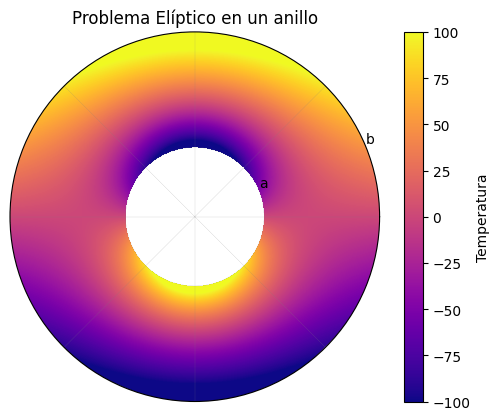

In [5]:
# Se utilizan las siguientes bibliotecas:
import matplotlib.pyplot as plt    # Para las gráficas
import numpy as np                 # Para el uso de arrays
from IPython.display import HTML            # Para poder visualizar la animación en el notebook

# La siguiente instrucción se utiliza para habilitar el modo interactivo en el notebook
%matplotlib inline

# Parámetros del problema
a = 0.75   # Radio r=a
b = 2   # Radio r=b
rad = 2*np.pi    # Ángulos hasta 2*pi
N = 2000                      # Número de puntos para la discretización
theta = np.linspace(0,rad, N + 1)   # Puntos en el intervalo [0,beta] en grados
r = np.linspace(a,b,N + 1 )   # Puntos en el intervalo [0,a]
R,Theta = np.meshgrid(r,theta)
U_pol = np.zeros((N+1,N+1))  # Matriz que guardará la solución para cada (theta,r)
N_s = 3    # Número de términos para la serie 

def coeff_g(n):
    """Función que regresa una tupla con los coeficientes: a_n , b_n 
    de la serie de Fourier la función g(θ)

    Parametros
    ----------
    n: int
        Número natural mayor o igual a 1.
    
    Returns
    -------
    : tuple 
        coeficiente a_n y b_n de g.
    """
    ## Coeficientes de las función g(θ) =100 si -π<θ<0 ; -100 0<θ<π:
    if n == 0:
        val_0 = 0   # coeficiente a_0
        return val_0
    else:   
        val_1 = 0  # coeficiente a_n
        #val_2 = 0  # coeficiente b_n
        ####### Función de la tarea ###########
        if n%2 == 0:
            val_2 = 0
        else:
            val_2 = -4/(np.pi*n)*100
        ######################################
        return (val_1,val_2)

def coeff_h(n):
    """Función que regresa una tupla con los coeficientes: a_n , b_n 
    de la serie de Fourier la función h(θ)

    Parametros
    ----------
    n: int
        Número natural mayor o igual a 1.
    
    Returns
    -------
    : tuple 
        coeficiente a_n y b_n de h.
    """
    ## Coeficientes de las función h(θ) =-100 si -π<θ<0 ; 100 0<θ<π:
    if n == 0:
        val_0 = 0   # coeficiente c_0
        return val_0
    else:   
        val_1 = 0  # coeficiente c_n
        #val_2 = 0  # coeficiente d_n
        ####### Función de la tarea ###########
        if n%2 == 0:
            val_2 = 0
        else:
            val_2 = 4/(np.pi*n)*100
        ######################################
        
        return (val_1,val_2)


def sol():
    """Función que regresa el valor u(r,θ) hasta un número determinado de terminos N_s    
    
    Returns
    -------
    sol: array 
        Solución u(r,θ)
    """
    sol = np.ones((N+1,N+1))
    valor0 = coeff_h(0)+coeff_g(0)  #(c_0+a_0)
    valor1 = coeff_h(0)-coeff_g(0)  #(c_0-a_0)
    valor2 = np.log(b) - np.log(a) #(ln(b) - ln(a))
    valor3 = np.log(b) + np.log(a) #(ln(b) + ln(a))   
    C_0 = 0.5*valor0-0.5*(valor1*valor3)/valor2
    D_0 = valor1/valor2
    sol = 0.5*C_0*sol + 0.5*D_0*np.log(R)
    for n in range(1,N_s):
        coeficientes_g = coeff_g(n)
        a_n = coeficientes_g[0]   # coeficiente a_n
        b_n = coeficientes_g[1]   # coeficiente b_n

        coeficientes_h = coeff_h(n)
        c_n = coeficientes_h[0]   # coeficiente a_n
        d_n = coeficientes_h[1]   # coeficiente b_n
        valor_m = (a**(-n))/(a**n)   # a^{-n}/a^n
        valor_d = (a**n)*(b**(-n)) - (b**n)*(a**(-n))   # a^n b^{-n} - a^{-n}b^n
        # Coeficientes A_n,B_n,C_n,D_n
        C_n = a_n/(a**n) - valor_m*(c_n*(a**n)- a_n*(b**n))/valor_d
        D_n = (c_n*(a**n)- a_n*(b**n))/valor_d
        A_n = b_n/(a**n) - valor_m*(d_n*(a**n)- b_n*(b**n))/valor_d
        B_n = (d_n*(a**n)- b_n*(b**n))/valor_d
        sol = sol + (C_n*np.power(R,n) + D_n*np.power(R,-n))*np.cos(n*Theta)
        sol = sol + (A_n*np.power(R,n) + B_n*np.power(R,-n))*np.sin(n*Theta)
    return sol

U_pol = sol()  # solución en coordenadas polares


# Se crean las fiiguras y se fijan los parametros 
# Graficar en coordenadas polares
plt.figure()
ax = plt.subplot(111, projection='polar')  # Crear el gráfico polar

mapa_calor = ax.pcolormesh(Theta, R, U_pol, cmap='plasma', vmin=-100, vmax=100)

# Añadir una barra de color
calor_bar = plt.colorbar(mapa_calor)
calor_bar.set_label('Temperatura')

# Ajustes de los ejes, etiquetas y título
ax.set_title('El Laplaciano en una cuña')
ax.grid(color='grey', linestyle='-', linewidth=0.1)

# Títulos y etiquetas
ax.set_title("Problema Elíptico en un anillo")
ax.set_yticks([a, b])  # radios
ax.set_yticklabels([r'a', r'b'])  
ax.set_xticklabels([])

plt.show() # Mostrar gráficoax.set_yticklabels([])
#plt.savefig("Anillo_ejemplo.png")

